In [0]:
from pandas import DataFrame
from google.colab import files
uploaded = files.upload()

Saving data_set.csv to data_set (1).csv


Reading the dataset and Viewing the top row values of the dataset 


In [0]:
import pandas as pd
df=pd.read_csv("data_set (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking the Datatypes of the attributes in the dataset


In [0]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Counting Null values in the dataset

In [0]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing the blank column values with the most common values of that attribute using mode function

In [0]:
from scipy.stats import mode
df['Gender'].fillna(mode(list(df['Gender'])).mode[0], inplace=True)
df['Self_Employed'].fillna(mode(list(df['Self_Employed'])).mode[0], inplace=True)
df['Married'].fillna(mode(list(df['Married'])).mode[0], inplace=True)
df['Loan_Amount_Term'].fillna(mode(list(df['Loan_Amount_Term'])).mode[0], inplace=True)
df['Credit_History'].fillna(mode(list(df['Credit_History'])).mode[0], inplace=True)

Replacing the values of dependent column to integer type. So that we could find mean

In [0]:

df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].replace('0',0,inplace=True)
df['Dependents'].replace('1',1,inplace=True)
df['Dependents'].replace('2',2,inplace=True)

Filling the Null value cell or blank cell with the mean value of the column

In [0]:
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

Checking if there are Null values in the dataset

In [0]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Plotting a graph to check count of each type of value of the column/attribute

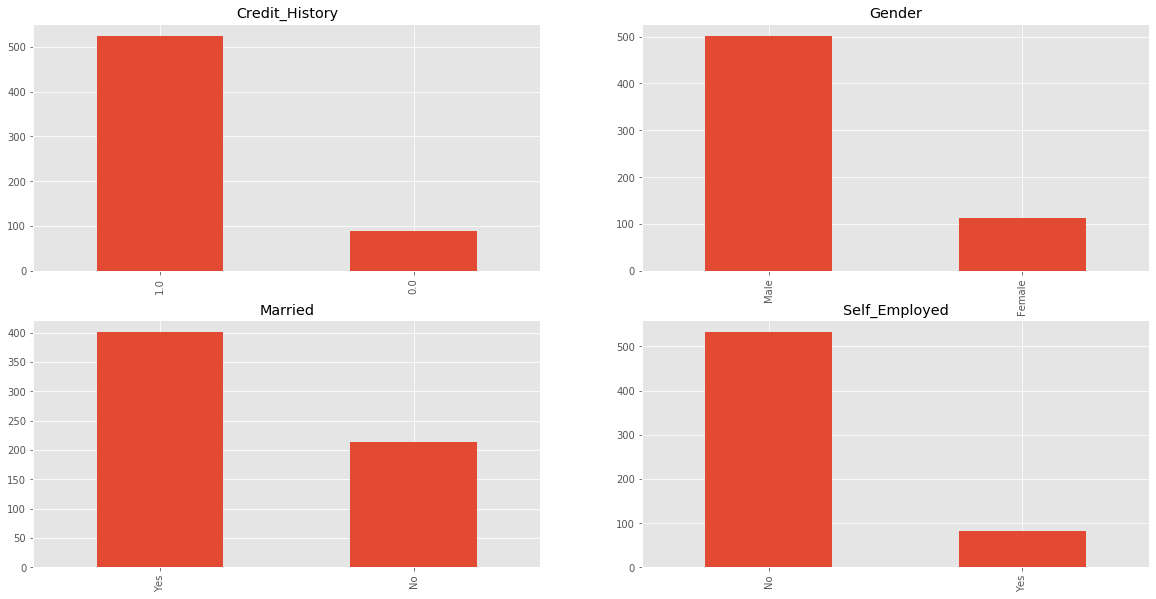

In [0]:
import matplotlib.pyplot as plt
plt.figure(1)

plt.subplot(221)
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History')
plt.subplot(222)
df['Gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(223)
df['Married'].value_counts().plot.bar(title= 'Married')

plt.subplot(224)
df['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed')
plt.show()

Plotting graph of Gender with respect to Loan Status column

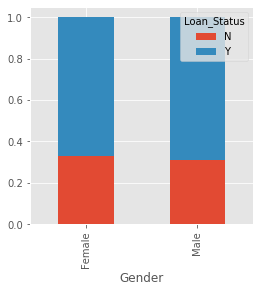

In [0]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Plotting graph of Education with respect to Loan Status column

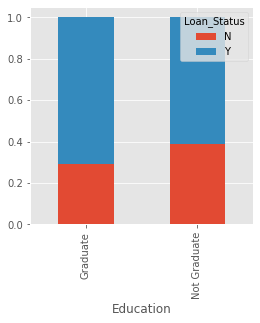

In [0]:
Edu=pd.crosstab(df['Education'],df['Loan_Status'])
Edu.div(Edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Plotting graph of Credit History with respect to Loan Status column

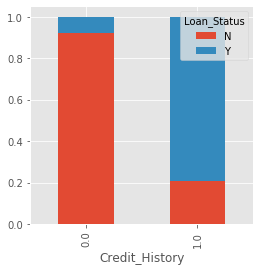

In [0]:
CH=pd.crosstab(df['Credit_History'],df['Loan_Status'])
CH.div(CH.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Plotting graph of Married with respect to Loan Status column

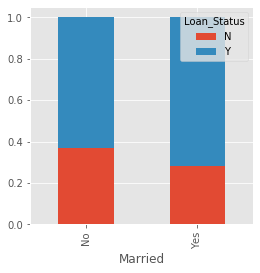

In [0]:
mar=pd.crosstab(df['Married'],df['Loan_Status'])
mar.div(mar.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Plotting graph of Self Employed with respect to Loan Status column

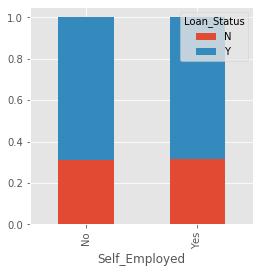

In [0]:
selfemp=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
selfemp.div(selfemp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Checking the dataset values

In [0]:

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Convert all the non numeric data to numbers. For this we use label encoding. It is used to convert labels to numeric form.

In [0]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))

Defining the columns needed for prediction and also the target column.

In [0]:
X=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
y=['Loan_Status']


Splitting the data into training and testing set

In [0]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(df[X],df[y],test_size=0.3)

PreProcessing of data before passing it to the model

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Selection of model and fitting the data to the model
Here I have used logistic regression model as it is simple to implement when the target column has only 2 values

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Making predictions on the testing data

In [0]:
pred = model.predict(X_test)

Checking the accuracy with the help of target column of testing data

In [0]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(pred,y_test))

0.8216216216216217


In [0]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           N       0.41      1.00      0.58        23
           Y       1.00      0.80      0.89       162

    accuracy                           0.82       185
   macro avg       0.71      0.90      0.73       185
weighted avg       0.93      0.82      0.85       185

